In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from transformers import BertTokenizer, TFBertForSequenceClassification


In [11]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv")
print(df.head(10))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [12]:
df.isnull().sum()

,0
review,0
sentiment,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
# Download NLTK data
import nltk
nltk.download('punkt')  # For word_tokenize
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')  # For lemmatizer
nltk.download('omw-1.4')  # For lemmatizer's extended wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Step 1: Lowercasing, Tokenization
df['processed_text'] = df['review'].apply(lambda text: word_tokenize(text.lower()))

# Step 2: Removing stopwords and non-alphanumeric tokens
df['processed_text'] = df['processed_text'].apply(
    lambda tokens: [word for word in tokens if word.isalnum() and word not in stop_words]
)

# Step 3: Lemmatization
df['processed_text'] = df['processed_text'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)

# Step 4: Joining tokens back into a single string
df['processed_text'] = df['processed_text'].apply(lambda tokens: ' '.join(tokens))


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to the top 5000
tfidf_matrix = vectorizer.fit_transform(df['processed_text']).toarray()  # Transform text to TF-IDF matrix

# Encode sentiment labels using lambda
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Print the shape of the feature matrix and labels
print("Feature matrix shape:", tfidf_matrix.shape)
print("Labels shape:", labels.shape)

# Display sample feature names
print("Sample Feature Names:", vectorizer.get_feature_names_out()[:10])  # Show first 10 features


Feature matrix shape: (50000, 5000)
Labels shape: (50000,)
Sample Feature Names: ['10' '100' '11' '12' '13' '13th' '14' '15' '16' '17']


In [18]:
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8361
Precision: 0.8475061324611611
Recall: 0.8227822980750149
F1 Score: 0.8349612325042796


In [24]:
#Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
y_pred_log = log_model.predict(X_test_vec)

#Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))



Logistic Regression Accuracy: 0.8896
logistic regression: 0.8361
Precision: 0.8475061324611611
Recall: 0.8227822980750149
F1 Score: 0.8349612325042796


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)

# Build and compile LSTM model
model = Sequential([
    Embedding(5000, 128, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 240s 236ms/step - accuracy: 0.7417 - loss: 0.5039 - val_accuracy: 0.8679 - val_loss: 0.3260
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 241s 241ms/step - accuracy: 0.8946 - loss: 0.2642 - val_accuracy: 0.8846 - val_loss: 0.2826
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 264s 243ms/step - accuracy: 0.9234 - loss: 0.2029 - val_accuracy: 0.8758 - val_loss: 0.3055
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 261s 242ms/step - accuracy: 0.9372 - loss: 0.1726 - val_accuracy: 0.8819 - val_loss: 0.2983
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 263s 243ms/step - accuracy: 0.9542 - loss: 0.1320 - val_accuracy: 0.8825 - val_loss: 0.3491
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step
LSTM Accuracy: 0.8837


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

# Assuming X_train_pad, X_test_pad, y_train, and y_test are already defined
max_len = 200  # Define max_len if not already defined

# Build CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate
y_pred_cnn = (cnn_model.predict(X_test_pad) > 0.5).astype("int32")
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 72ms/step - accuracy: 0.7241 - loss: 0.4868 - val_accuracy: 0.8906 - val_loss: 0.2692
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 72s 72ms/step - accuracy: 0.9202 - loss: 0.2068 - val_accuracy: 0.8808 - val_loss: 0.2867
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.9572 - loss: 0.1201 - val_accuracy: 0.8855 - val_loss: 0.3392
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.9834 - loss: 0.0506 - val_accuracy: 0.8811 - val_loss: 0.4213
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.8805 - val_loss: 0.5267
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
CNN Accuracy: 0.8843


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined
max_len = 200  # Maximum length of input sequences

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Build RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    SimpleRNN(64),  # RNN layer
    Dropout(0.3),    # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_rnn = (rnn_model.predict(X_test_pad) > 0.5).astype("int32")
print("RNN Accuracy:", accuracy_score(y_test, y_pred_rnn))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6245 - loss: 0.6250 - val_accuracy: 0.7703 - val_loss: 0.5122
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7928 - loss: 0.4565 - val_accuracy: 0.8039 - val_loss: 0.4534
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.6807 - loss: 0.5862 - val_accuracy: 0.6655 - val_loss: 0.6034
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - accuracy: 0.6990 - loss: 0.5642 - val_accuracy: 0.6230 - val_loss: 0.6336
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.7067 - loss: 0.5550 - val_accuracy: 0.6231 - val_loss: 0.6377
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
RNN Accuracy: 0.6166


In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_models(models, X_test, y_test):
    results = []

    for model_name, model in models.items():
        # Predict probabilities and convert to binary predictions
        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs > 0.5).astype(int)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

        # Extract confusion matrix values
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Append metrics to results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': report['Positive']['precision'],
            'Recall': report['Positive']['recall'],
            'F1 Score': report['Positive']['f1-score'],
            'Negatives': tn,
            'Positives': fp,

        })

    results_df = pd.DataFrame(results)

    # Determine the best model based on a specific metric (e.g., F1 Score)
    best_model = results_df.loc[results_df['F1 Score'].idxmax()]

    return results_df, best_model

# Example usage
models = {
    'Logistic Regression': model,
    'Naive Bayes': model,
    'LSTM': model,
    'RNN': rnn_model,
    'CNN': cnn_model
}

performance_df, best_model = evaluate_models(models, X_test_pad, y_test)
print(performance_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
print("\nBest Model Based on F1 Score:")
print(best_model)


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.8837   0.865937  0.910101  0.887470
1          Naive Bayes    0.8837   0.865937  0.910101  0.887470
2                 LSTM    0.8837   0.865937  0.910101  0.887470
3                  RNN    0.6166   0.612177  0.652510  0.631700
4                  CNN    0.8843   0.895477  0.872197  0.883684

Best Model Based on F1 Score:
Model        Logistic Regression
Accuracy                  0.8837
Precision               0.865937
Recall                  0.910101
F1 Score                 0.88747
Negatives                   4251
Positives                    710
Name: 0, dtype: object


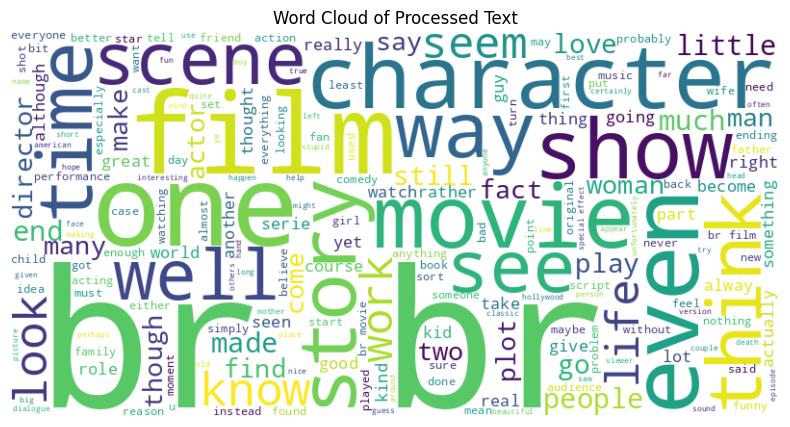

In [33]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(df['processed_text'].astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Processed Text')
plt.show()


In [36]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.3 MB/s eta 0:00:00


In [40]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
# Use the tfidf matrix created earlier, which is named 'tfidf_matrix'
lda.fit(tfidf_matrix)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    # Access feature names using the correct variable name which is 'vectorizer'
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
['gore', 'greatly', 'violent', 'one', 'must', 'musicians', 'spirited', 'mst3k', 'filmed', 'bother']
Topic 2:
['maniac', 'tonight', 'century', 'getting', 'liners', 'gore', 'mst3k', 'one', 'filmed', 'bother']
Topic 3:
['century', 'act', 'one', 'acted', 'plot', 'gore', 'away', 'filmed', 'mst3k', 'bother']
Topic 4:
['sing', 'would', 'received', 'gore', 'away', 'one', 'liners', 'filmed', 'mst3k', 'bother']
Topic 5:
['low', 'tonight', 'liners', 'likes', 'century', 'one', 'stunts', 'mst3k', 'filmed', 'bother']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


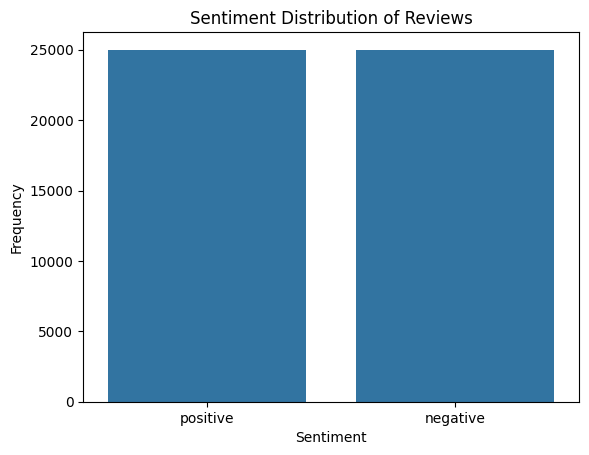

In [43]:
# Sample visualization of sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df) # Changed from histplot to countplot and used 'sentiment'
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


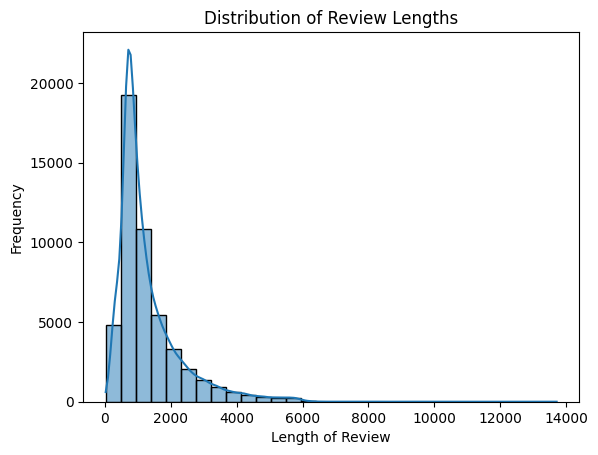

In [44]:
# Visualize the length of reviews
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-78c25157fe5a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_movies, x='genre', y='review_length', palette='viridis')


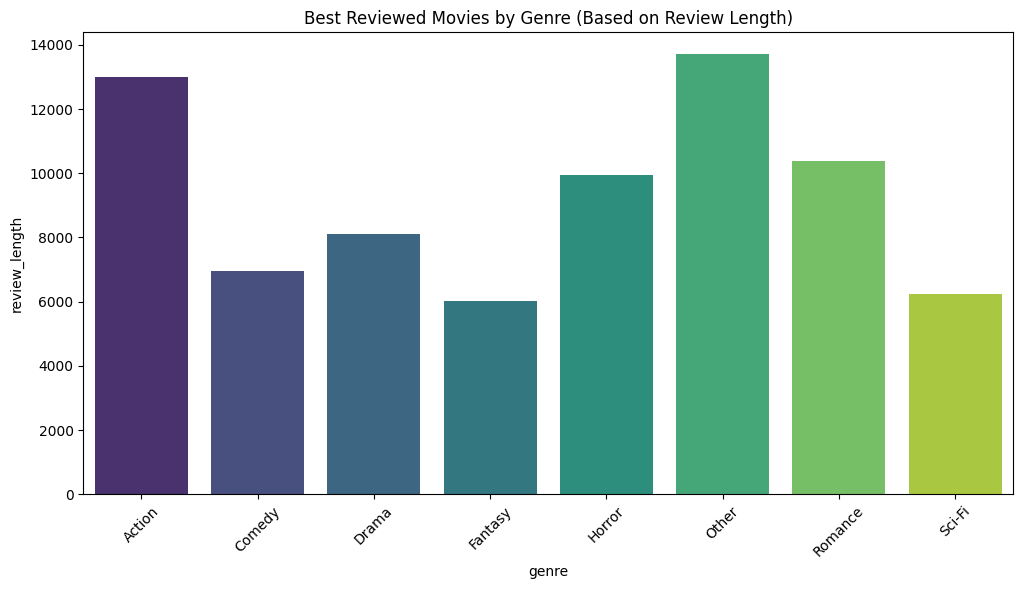

<ipython-input-47-78c25157fe5a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_movies, x='genre', y='review_length', palette='viridis')


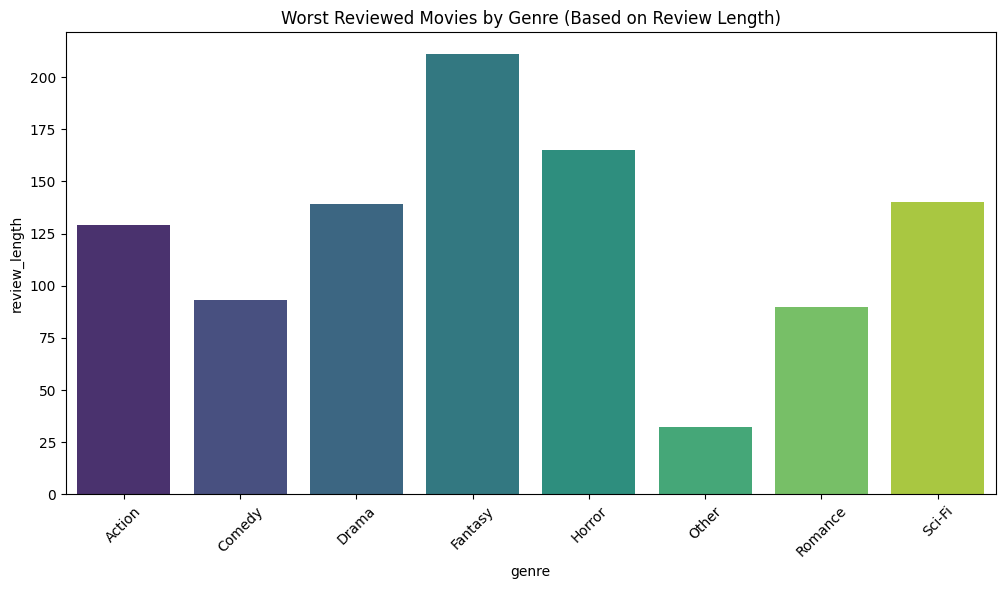

In [47]:
# Create proxy genre column using simple keyword matching
def assign_genre(review):
    review = review.lower()
    if re.search(r'\baction\b|\bthriller\b|\bmilitary\b|\bcops\b', review):
         return 'Action'
    elif re.search(r'\bcomedy\b|\bsitcom\b|\bfunny\b', review):
        return 'Comedy'
    elif re.search(r'\bhorror\b|\bscary\b|\bmonster\b|\bghost\b', review):
        return 'Horror'
    elif re.search(r'\bdrama\b|\bsad\b|\bemotional\b', review):
        return 'Drama'
    elif re.search(r'\bfantasy\b|\bmagic\b|\belves\b|\bdragons\b', review):
      return 'Fantasy'
    elif re.search(r'\bsci-fi\b|\bscience fiction\b|\bfuturistic\b|\bspace\b', review):
      return 'Sci-Fi'
    elif re.search(r'\bromance\b|\blove\b', review):
      return 'Romance'
    else:
        return 'Other'

df['genre'] = df['review'].apply(assign_genre)

# Visualizing best-reviewed movies by genre
# Changed 'rating' to 'review_length'
best_movies = df.loc[df.groupby('genre')['review_length'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(data=best_movies, x='genre', y='review_length', palette='viridis')
plt.title('Best Reviewed Movies by Genre (Based on Review Length)')
plt.xticks(rotation=45)
plt.show()

# Visualizing worst-reviewed movies by genre
# Changed 'rating' to 'review_length'
worst_movies = df.loc[df.groupby('genre')['review_length'].idxmin()]
plt.figure(figsize=(12, 6))
sns.barplot(data=worst_movies, x='genre', y='review_length', palette='viridis')
plt.title('Worst Reviewed Movies by Genre (Based on Review Length)')
plt.xticks(rotation=45)
plt.show()

                                                                  ....**ANALYSIS ENDS**😊....